<a href="https://colab.research.google.com/github/msj102525/study_python/blob/main/2_5_nn_spiral_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
from torch.autograd import Variable
import matplotlib.pyplot as plt

# **matplotlib inline**
iPython 에서 제공되는 Rich output 명령 구문임 \
Rich output : 도표, 그림, 소리, 애니메이션 같은 결과물을 말함 \
jupyter notebook 을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는

In [2]:
# 선형으로 분석할 수 없는 데이터를 생성
# 나선형 데이터 세트를 샘플로 생성함
N = 100  # numper of points per class
D = 2  # dimensionallity
K = 3  # number of classes
X = np.zeros((N * K, D)) # data matrix (each row = single example)
y = np.zeros(N * K, dtype='uint8') # class labels

for j in range(K):
  ix = range(N * j, N * (j + 1))  # radius
  r = np.linspace(0.0, 1, N)
  t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2 # theta
  X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
  y[ix] = j

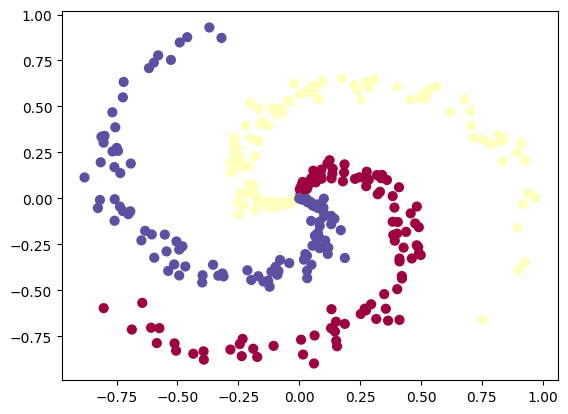

In [3]:
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [4]:
# Softmax 선형 분류기로 학습
num_epoch = 10000

x = torch.from_numpy(X).type_as(torch.FloatTensor())
y_ = torch.from_numpy(y).type_as(torch.LongTensor())
x.size(), y_.size()

(torch.Size([300, 2]), torch.Size([300]))

In [6]:
# modle design
model = nn.Sequential(
    nn.Linear(2, 20),
    nn.ReLU(),
    nn.Linear(20, 10),
    nn.ReLU(),
    nn.Linear(10, 5),
    nn.ReLU(),
    nn.Linear(5, 5),
    nn.ReLU(),
    nn.Linear(5, 3)
).cuda()

# 손실함수
loss_func = nn.CrossEntropyLoss()
# 최적화 함수
optimizer = optim.Adam(model.parameters(), lr=0.001)

label = y_.cuda()

In [7]:
# 학습시키기
for i in range(num_epoch):
  optimizer.zero_grad()
  output = model(Variable(x.cuda()))
  loss = loss_func(output, Variable(label))
  loss.backward()
  optimizer.step()

  if i % 100 == 0:
    print(loss)

tensor(1.1111, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0437, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7885, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4285, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2216, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0934, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0552, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0403, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0324, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0275, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0241, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0215, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0196, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0182, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0171, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0162, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0154, device='cuda:0', grad_fn=